# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [15]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\gjgut\AppData\Local\Temp\ipykernel_14960\2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

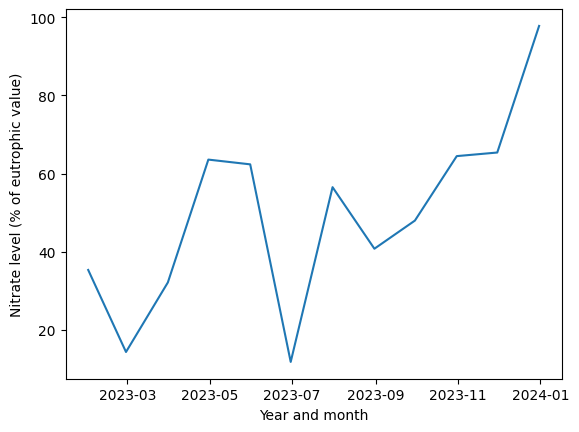

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

C:\Users\gjgut\AppData\Local\Temp\ipykernel_14960\1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

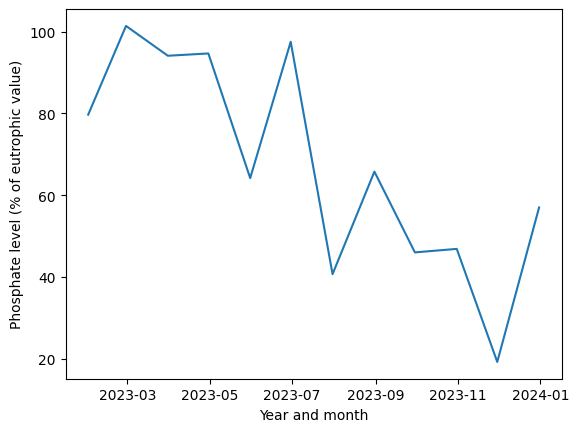

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

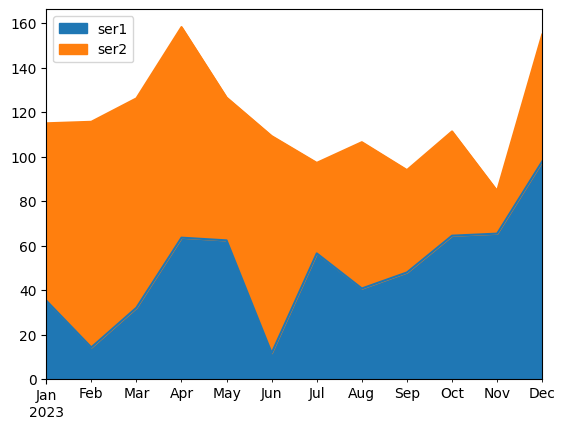

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

<Axes: title={'center': 'Nitrate and phosphate levels in 2023'}, xlabel='Year and month', ylabel='Nutrient level (% of eutrophic value)'>

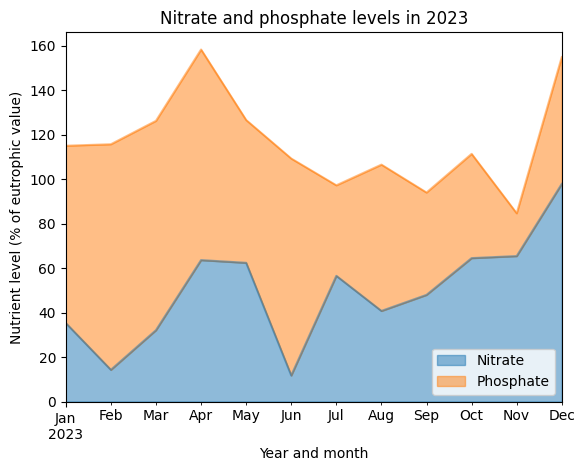

In [8]:
df = pd.DataFrame({'Nitrate': time_series, 'Phosphate': time_series_2}, index = datearray)
df.plot.area(alpha = 0.5, title = "Nitrate and phosphate levels in 2023", ylabel = "Nutrient level (% of eutrophic value)", xlabel = "Year and month")

# Changes made to the graph:
- Added title, x and y axis labels
- Adjusted the alpha to 0.5 to make the lines more visible
### I chose an area plot to show the cumulative effect of both nitrate and phosphate levels over time, which can help highlight periods where both nutrients are elevated. However, it can also make it harder to distinguish between the two lines if they overlap significantly. In contrast, separate line graphs would allow for clearer comparison of the two nutrients but may not convey the overall nutrient load as effectively.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

# Logistics and supply chain dataset - Milestone 3 Gustavo Joshua Gutierrez

### Problem: This project's main focus is to predict delivery delays, optimize loading times and reduce shipping costs. We aim to predict this using the logistics shipment dataset from kaggle to find bottlenecks in these areas where we are suffering. Through extensive testing and algorithm optimization we will locate the bottlenecks and find optimized routes or warehouses.

In [9]:
logi_supply = pd.read_csv('datasets/logistics_supply.csv')
logi_supply.head()

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [10]:
logi_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

<Axes: >

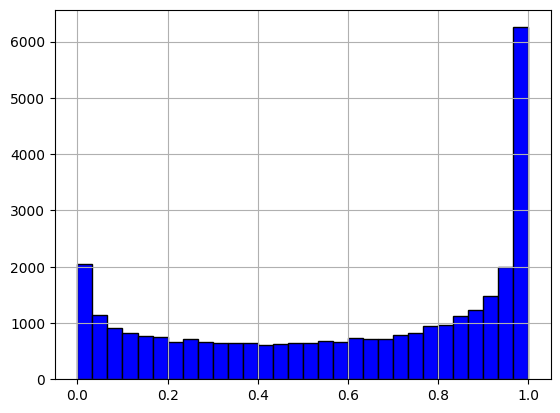

In [21]:
logi_supply['order_fulfillment_status'].hist(bins=30, color='blue', edgecolor='black')

In [11]:
logi_supply.describe()

,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,...,historical_demand,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,delivery_time_deviation
count,32065.000000,32065.000000,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000,3.206500e+04,32065.000000,3.206500e+04,...,32065.000000,32065.000000,3.206500e+04,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000,32065.000000,32065.000000
mean,38.023589,-90.116648,8.011735,2.893068,4.991493e+00,2.992547e+02,2.291669,3.026954e-01,0.600740,4.976082e-01,...,6022.001286,0.044792,2.972816e-01,7.001144,2.296448,4.983913e-01,6.008723e-01,0.803656,0.699077,5.177648
std,6.917909,17.369244,4.264960,2.274044,3.532048e+00,3.234435e+02,1.554202,3.259146e-01,0.345672,3.532853e-01,...,3427.638017,14.187486,3.216115e-01,3.236328,1.555932,3.541589e-01,3.458101e-01,0.279185,0.324514,4.157988
min,30.000000,-119.999998,5.000000,-1.999993,1.091633e-09,1.322210e-12,0.500000,4.565769e-16,0.000001,4.536949e-09,...,100.002966,-10.000000,7.255415e-19,0.000050,0.500000,4.043927e-09,3.269508e-07,0.000048,0.000003,-1.999998
25%,31.280550,-106.253913,5.019984,1.185744,1.474720e+00,1.605163e+01,0.774798,1.710828e-02,0.277096,1.440135e-01,...,2822.607616,-9.931074,1.678269e-02,4.593407,0.776166,1.443567e-01,2.783148e-01,0.693739,0.456009,1.269197
50%,36.413820,-86.293414,5.636036,3.882059,4.981244e+00,1.572880e+02,1.917121,1.595151e-01,0.680553,4.961781e-01,...,6785.123209,-7.858681,1.549760e-01,8.385605,1.938273,4.988468e-01,6.831130e-01,0.958128,0.839599,6.113662
75%,44.453655,-73.079367,9.669944,4.884355,8.534902e+00,5.405980e+02,3.734188,5.535954e-01,0.938160,8.498226e-01,...,9374.252913,6.024012,5.405408e-01,9.836152,3.750817,8.510762e-01,9.372889e-01,0.998746,0.982391,9.249206
max,50.000000,-70.000000,19.999875,5.000000,9.999999e+00,9.999993e+02,5.000000,9.999995e-01,1.000000,1.000000e+00,...,10000.000000,39.999886,1.000000e+00,10.000000,5.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,10.000000


## Univariate analysis

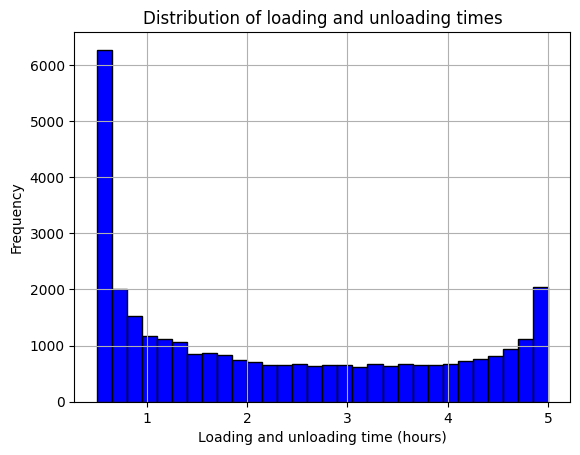

In [17]:
logi_supply['loading_unloading_time'].hist(bins=30, color='blue', edgecolor='black')
plt.xlabel("Loading and unloading time (hours)")
plt.ylabel("Frequency")
plt.title("Distribution of loading and unloading times")
plt.show()


### bivariate analysis

<Axes: >

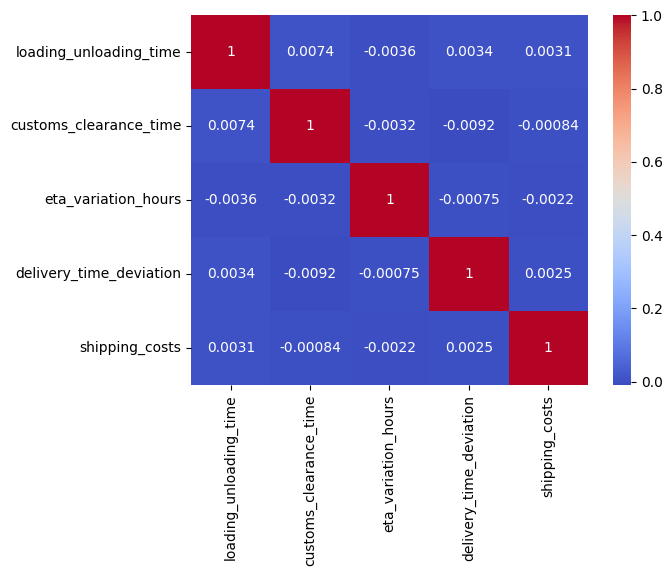

In [19]:
logi_supply[['loading_unloading_time', 'customs_clearance_time', 'eta_variation_hours','delivery_time_deviation', 'shipping_costs']].corr()
sns.heatmap(logi_supply[['loading_unloading_time', 'customs_clearance_time', 'eta_variation_hours','delivery_time_deviation', 'shipping_costs']].corr(), annot=True, cmap='coolwarm')

### findings and conclusions
during the bivariate analysis, 5 different features were chosen on the premise they would have high correlation. The features chosen were 'loading unloading time', 'customs clearance time', 'eta variation hours', 'delivery time deviation', and 'shipping costs'. Unexpectedly, the analysis revealed that all of them had little to no correlation. all of them hovering over a almost perfect 0 correlation score.

# Models
Predicting Delivery Time Deviation: Model Selection and Evaluation

The Goal & Baseline

Based on the bivariate analysis findings, we will predict delivery time deviation using a Linear Regression model as our baseline to establish initial performance benchmarks.

The Advanced Models

Given the lack of linear correlation observed between features, we will test three non-linear models—Decision Tree Regression, Random Forest Regression, and Support Vector Regression—to capture complex relationships that linear approaches may miss.

The Evaluation Strategy

Model performance will be assessed using Mean Absolute Error (MAE) with cross-validation to prevent overfitting, and hyperparameters will be optimized through grid search, with feature importance analysis conducted for ensemble methods.

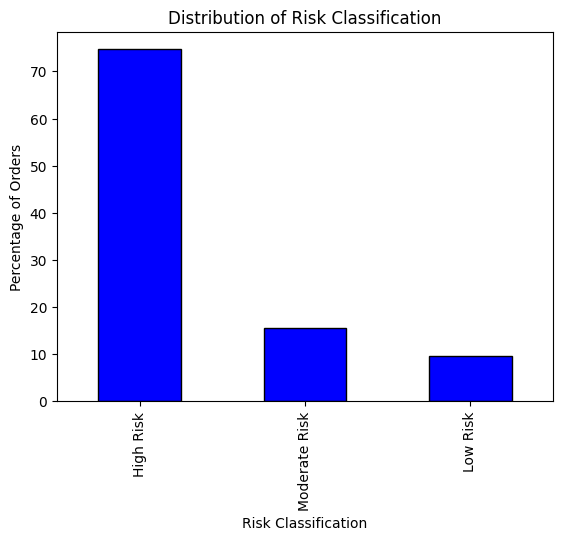

risk_classification
High Risk        74.673320
Moderate Risk    15.627631
Low Risk          9.699049
Name: proportion, dtype: float64


In [28]:
percentages = logi_supply['risk_classification'].value_counts(normalize=True) * 100
percentages.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel("Risk Classification")
plt.ylabel("Percentage of Orders")
plt.title("Distribution of Risk Classification")
plt.show()
print(percentages)

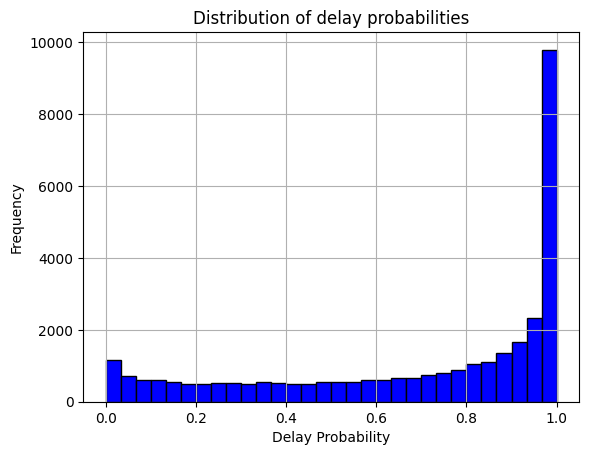

count    32065.000000
mean         0.699077
std          0.324514
min          0.000003
25%          0.456009
50%          0.839599
75%          0.982391
max          1.000000
Name: delay_probability, dtype: float64


In [30]:
logi_supply['delay_probability'].hist(bins=30, color='blue', edgecolor='black')
plt.xlabel("Delay Probability")
plt.ylabel("Frequency")
plt.title("Distribution of delay probabilities")
plt.show()
print(logi_supply['delay_probability'].describe())

<Axes: >

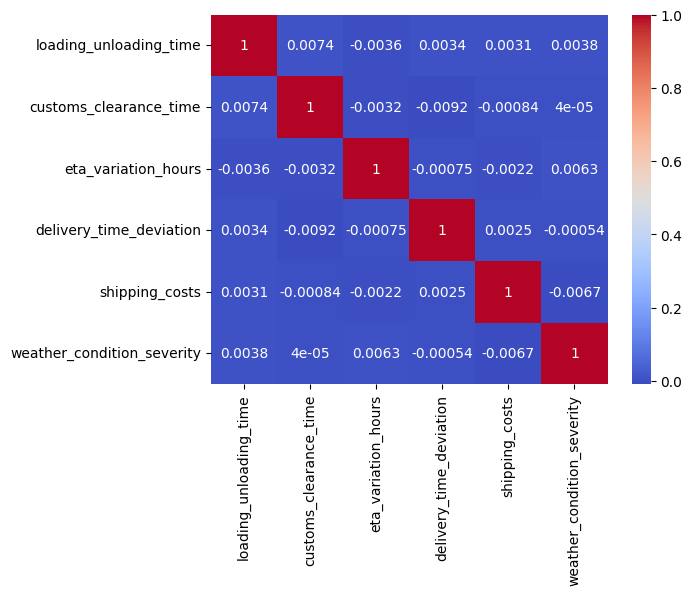

In [35]:
logi_supply[['loading_unloading_time', 'customs_clearance_time', 'eta_variation_hours','delivery_time_deviation', 'shipping_costs', 'weather_condition_severity']].corr()
sns.heatmap(logi_supply[['loading_unloading_time', 'customs_clearance_time', 'eta_variation_hours','delivery_time_deviation', 'shipping_costs', 'weather_condition_severity']].corr(), annot=True, cmap='coolwarm')

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

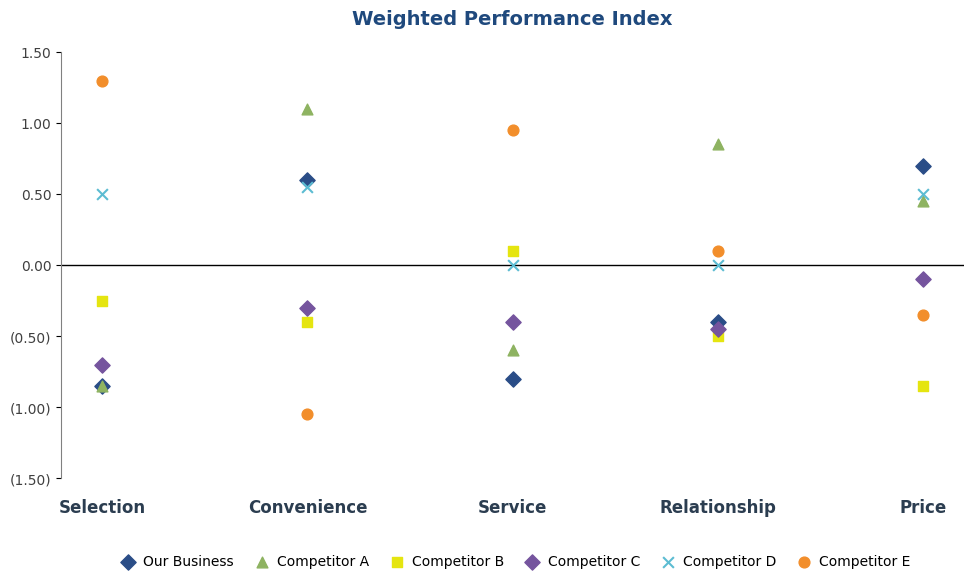

In [36]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Estimated data points based on the image
categories = ['Selection', 'Convenience', 'Service', 'Relationship', 'Price']
x = np.arange(len(categories))

data = {
    'Our Business': [-0.85, 0.6, -0.8, -0.4, 0.7],
    'Competitor A': [-0.85, 1.1, -0.6, 0.85, 0.45],
    'Competitor B': [-0.25, -0.4, 0.1, -0.5, -0.85],
    'Competitor C': [-0.7, -0.3, -0.4, -0.45, -0.1],
    'Competitor D': [0.5, 0.55, 0.0, 0.0, 0.5],
    'Competitor E': [1.3, -1.05, 0.95, 0.1, -0.35]
}

# Styles matching the legend
styles = {
    'Our Business': {'marker': 'D', 'color': '#2a4d87'}, # Dark Blue Diamond
    'Competitor A': {'marker': '^', 'color': '#8eb361'}, # Green Triangle
    'Competitor B': {'marker': 's', 'color': '#e5e510'}, # Yellow Square
    'Competitor C': {'marker': 'D', 'color': '#75549e'}, # Purple Diamond
    'Competitor D': {'marker': 'x', 'color': '#5cbcd2'}, # Light Blue X
    'Competitor E': {'marker': 'o', 'color': '#f28e2b'}  # Orange Circle
}

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for entity, values in data.items():
    ax.scatter(x, values, label=entity, marker=styles[entity]['marker'], 
               color=styles[entity]['color'], s=60, zorder=3)

# Add horizontal zero line
ax.axhline(0, color='black', linewidth=1, zorder=2)

# Format axes
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12, fontweight='bold', color='#2b3d50')
ax.tick_params(axis='x', length=0, pad=15) # Remove x-axis tick marks, add padding

ax.set_yticks(np.arange(-1.5, 1.51, 0.5))

# Custom formatter for y-axis to match the (1.50) style for negatives
def format_y_ticks(val, pos):
    if val < 0:
        return f'({abs(val):.2f})'
    return f'{val:.2f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))
ax.tick_params(axis='y', labelcolor='#404040')

# Title
ax.set_title('Weighted Performance Index', fontsize=14, fontweight='bold', color='#1f497d', pad=20)

# Clean up spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False) 
ax.spines['left'].set_color('#808080')

# Format legend to be horizontal at the bottom
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6, 
          frameon=False, handletextpad=0.1, columnspacing=1)

# Adjust layout and display
plt.tight_layout()
plt.show()